Group: Namitha Paul, Chau Le, Thao Nguyen

*   https://github.com/nguyen3006-thao/python_final_assignment

In [ ]:
!pip install yfinance
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 751.4 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import yfinance as yf              # a popular open source library to access the financial data available on Yahoo Finance
import matplotlib.pyplot as plt
import mplfinance as mpf           # a financial charting library of matplotlib

**STEPS:**
2.   Read the daily confirmed cases and deaths into two dataframes can be found at this github page:


> a)	Confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"




  > b)	deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"


3. Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level






In [ ]:
# URLs for confirmed cases and deaths data of COVID-19
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read data into DataFrames
confirmed_cases = pd.read_csv(confirmed_cases_url)
deaths = pd.read_csv(deaths_url)

# Sum confirmed cases and deaths of global Covid-19 for each date
confirmed_cases = confirmed_cases.iloc[:,4:].sum()
confirmed_cases.name = 'Covid-19 confirmed cases'
deaths = deaths.iloc[:,4:].sum()
deaths.name = 'Covid-19 deaths'

# Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level
global_covid = pd.concat([confirmed_cases, deaths],axis=1)

# Convert index to datetime
global_covid.index = pd.to_datetime(global_covid.index)

# Name index column
global_covid.index.name = 'Date'

global_covid


,Covid-19 confirmed cases,Covid-19 deaths
Date,,
2020-01-22,557,17
2020-01-23,657,18
2020-01-24,944,26
2020-01-25,1437,42
2020-01-26,2120,56
...,...,...
2023-03-05,676024901,6877749
2023-03-06,676082941,6878115
2023-03-07,676213378,6879038


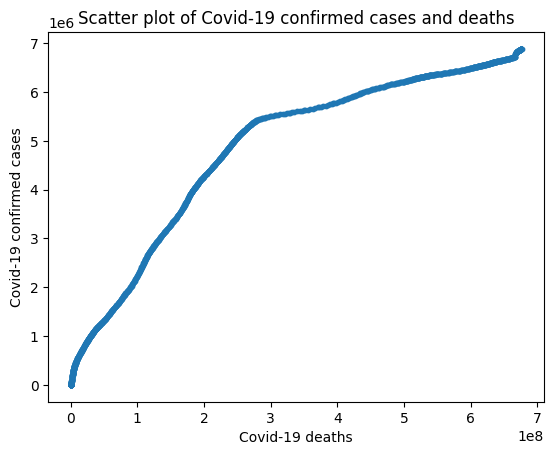

In [ ]:
#  Use scatter plot to show relationship between Covid-19 confirmed cases & deaths
plt.scatter(global_covid['Covid-19 confirmed cases'], global_covid['Covid-19 deaths'],s=10)
plt.title('Scatter plot of Covid-19 confirmed cases and deaths')
plt.xlabel('Covid-19 deaths')
plt.ylabel('Covid-19 confirmed cases')
plt.show()

In [ ]:
global_covid['Covid-19 confirmed cases'].corr(global_covid['Covid-19 deaths'])


0.9397632884933065

**Insight**: There is a strong positive correlation between Covid-19 confirmed cases and deaths.

**STEPS:**

4. Research a stock for each below that reflects the following industries (it will be used in the next step):

> a) Overall American Market

> b) Overall Canadian Market

> c) Travel sector

> d) The Real Estate sector

> e) Precious metals (Gold, Silver, Platinum, etc)

5. Use AlphaVantage (the stock API used earlier in the course) or other website to get the daily high and low prices for your selected stocks


In [ ]:
# Define the stocks and their corresponding symbols
# add 1 more stock for tsx index
stocks = {
          'S&P/TSX Composite index' : '^GSPTSE',    # representing roughly 70% of the total market capitalization on the Toronto Stock Exchange
          'Pfizer' : 'PFE',                         # an American multinational pharmaceutical corporation that developed the Covid-19 vaccine
          'Canadian Tire': 'CTC.TO',                # Canadian Tire, a stock of Canada Market, Toronto Stock Exchange
          'Air Canada': 'AC.TO',                    # Air Canada, Toronto Stock Exchange - Travel sector
          'Choice Properties REIT': 'CHP-UN.TO',    # Choice Properties REIT, Toronto Stock Exchange - The Real Estate sector
          'SPDR Gold Trust ETF': 'GLD'              # SPDR Gold Trust ETF - Precious metals
          }

# Define the date range (from start_date to the date before end_date)
start_date = '2020-02-01'
end_date = '2021-07-01'

# Create an empty DataFrame to store the data
stock_data = pd.DataFrame()

# Loop through the stocks
for stock_name, symbol in stocks.items():
    # Fetch historical stock data using yfinance
    data = yf.download(symbol, start=start_date, end=end_date)

    # Add 'Stock' and 'Symbol' columns
    data['Stock'] = stock_name
    data['Symbol'] = symbol


    # Append data to the DataFrame
    stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])

# Save the DataFrame to a CSV file
stock_data.to_csv('stock_data.csv', index=True)

stock_data

[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-e3476c7d04d1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-e3476c7d04d1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-e3476c7d04d1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-e3476c7d04d1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-e3476c7d04d1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-e3476c7d04d1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


,Stock,Symbol,High,Low,Open,Close
Date,,,,,,
2020-02-03,S&P/TSX Composite index,^GSPTSE,17441.599609,17351.000000,17351.000000,17379.800781
2020-02-04,S&P/TSX Composite index,^GSPTSE,17548.800781,17493.800781,17504.599609,17512.699219
2020-02-05,S&P/TSX Composite index,^GSPTSE,17674.000000,17606.099609,17629.400391,17651.599609
2020-02-06,S&P/TSX Composite index,^GSPTSE,17758.500000,17670.599609,17686.099609,17757.500000
2020-02-07,S&P/TSX Composite index,^GSPTSE,17716.699219,17633.000000,17705.400391,17655.500000
...,...,...,...,...,...,...
2021-06-24,SPDR Gold Trust ETF,GLD,167.229996,166.009995,167.000000,166.039993
2021-06-25,SPDR Gold Trust ETF,GLD,167.529999,166.289993,167.449997,166.589996
2021-06-28,SPDR Gold Trust ETF,GLD,166.910004,166.360001,166.679993,166.580002


**STEPS:**

6. Append stock info to the global covid data frame created in step 3



In [ ]:
# Join stock_data & global_covid dataframe
stock_covid = stock_data.join(global_covid)

# Save to csv file
stock_covid.to_csv('stock_covid.csv',index=True)

stock_covid

,Stock,Symbol,High,Low,Open,Close,Covid-19 confirmed cases,Covid-19 deaths
Date,,,,,,,,
2020-02-03,S&P/TSX Composite index,^GSPTSE,17441.599609,17351.000000,17351.000000,17379.800781,19887,428
2020-02-03,Pfizer,PFE,36.091084,35.388992,35.540798,35.588234,19887,428
2020-02-03,Canadian Tire,CTC.TO,198.500000,198.500000,198.500000,198.500000,19887,428
2020-02-03,Air Canada,AC.TO,45.180000,44.119999,44.369999,44.779999,19887,428
2020-02-03,Choice Properties REIT,CHP-UN.TO,14.909366,14.702920,14.743202,14.853978,19887,428
...,...,...,...,...,...,...,...,...
2021-06-30,Pfizer,PFE,39.270000,38.820000,39.139999,39.160000,182712726,3976679
2021-06-30,Canadian Tire,CTC.TO,252.669998,252.669998,252.669998,252.669998,182712726,3976679
2021-06-30,Air Canada,AC.TO,25.830000,25.370001,25.830000,25.500000,182712726,3976679


In [ ]:
# check whether dataset have null value
stock_covid.isnull().sum()


Stock                       0
Symbol                      0
High                        0
Low                         0
Open                        0
Close                       0
Covid-19 confirmed cases    0
Covid-19 deaths             0
dtype: int64

**STEPS:**

7. Create an appropriate graph detailing your info - explain why you chose the graphs you did, use matplotlib



> 7.1. We use mplfinance, a financial charting library of matplotlib to create a candelstick chart for each stock. Candlestick charts are widely used in financial markets to represent the price movement of stocks, over the time. They provide a visual representation of high, low, opening and closing prices for each date.



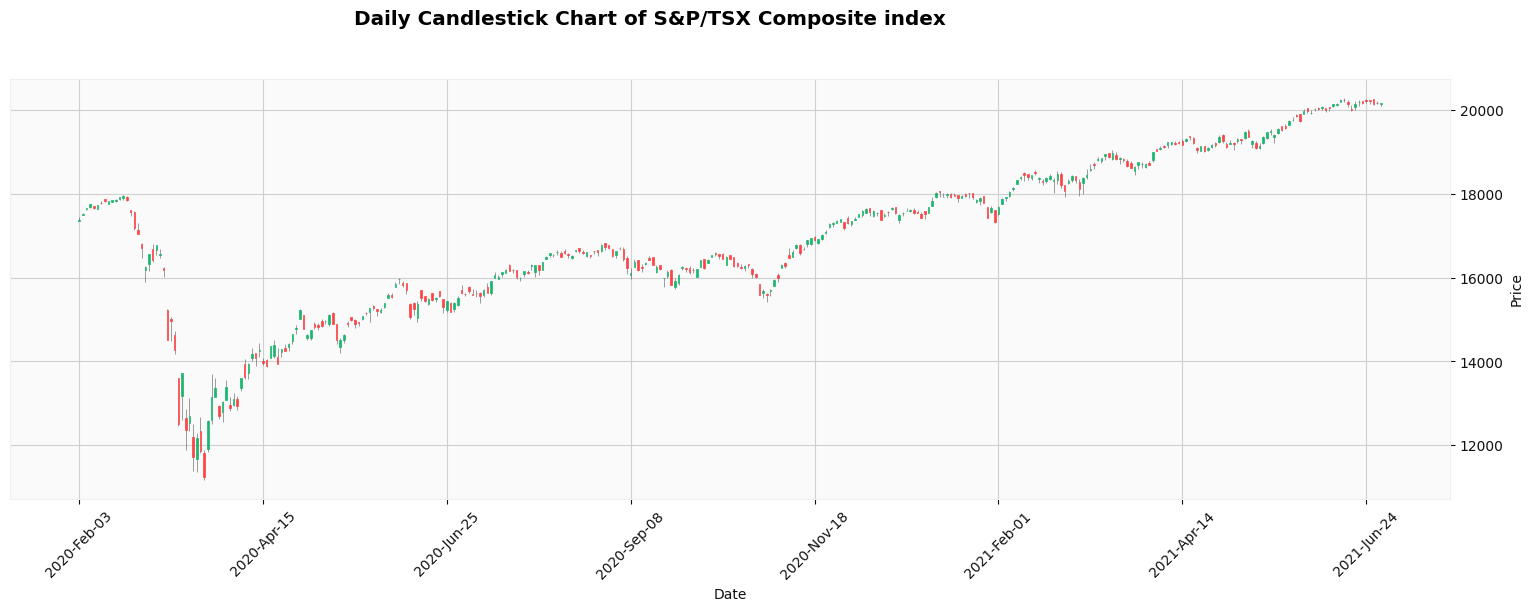

In [ ]:
# Get stock prices & Covid data for each stock symbol
TSX_Index = stock_covid[stock_covid['Symbol']=='^GSPTSE']
Pfizer = stock_covid[stock_covid['Symbol']=='PFE']
Canadian_Tire = stock_covid[stock_covid['Symbol']=='CTC.TO']
Air_Canada =  stock_covid[stock_covid['Symbol']=='AC.TO']
Choice_Properties = stock_covid[stock_covid['Symbol']=='CHP-UN.TO']
Gold = stock_covid[stock_covid['Symbol']=='GLD']

# Daily Candlestick chart of Pfizer
mpf.plot(TSX_Index[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of S&P/TSX Composite index', xlabel='Date',ylabel='Price',figsize=(20, 6))


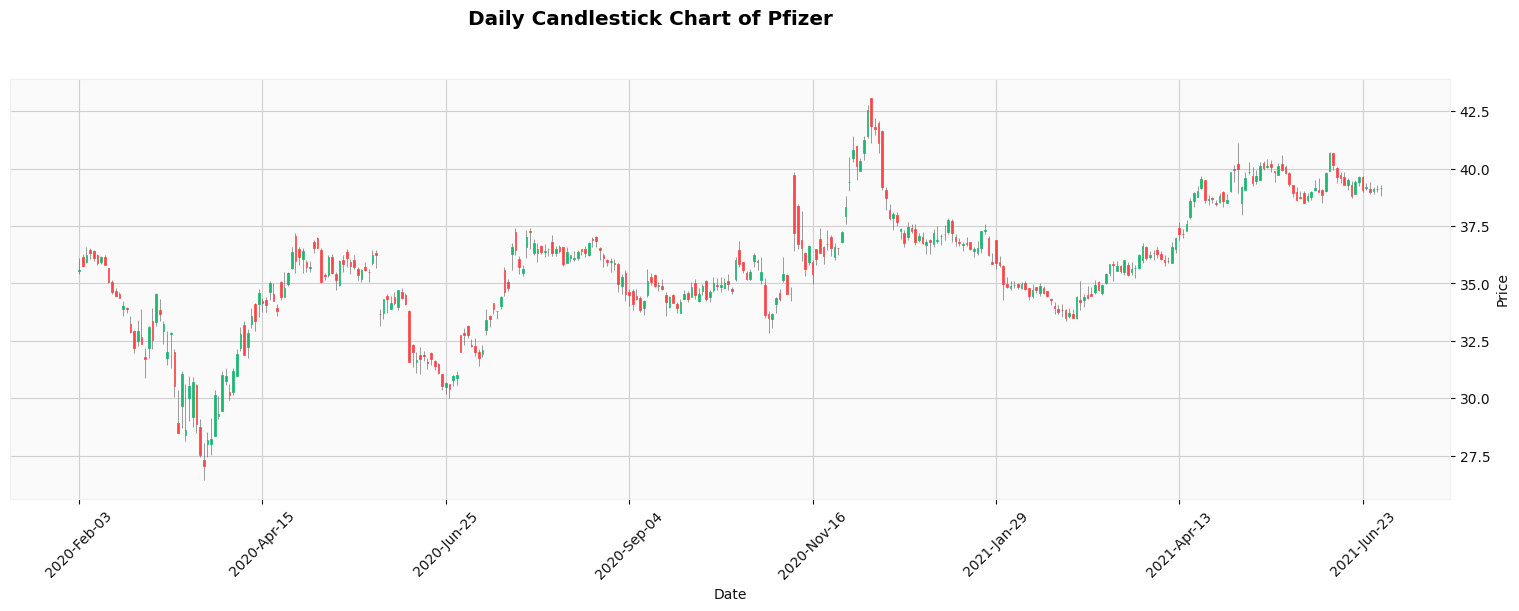

In [ ]:
# Daily Candlestick chart of Pfizer
mpf.plot(Pfizer[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of Pfizer', xlabel='Date',ylabel='Price',figsize=(20, 6))

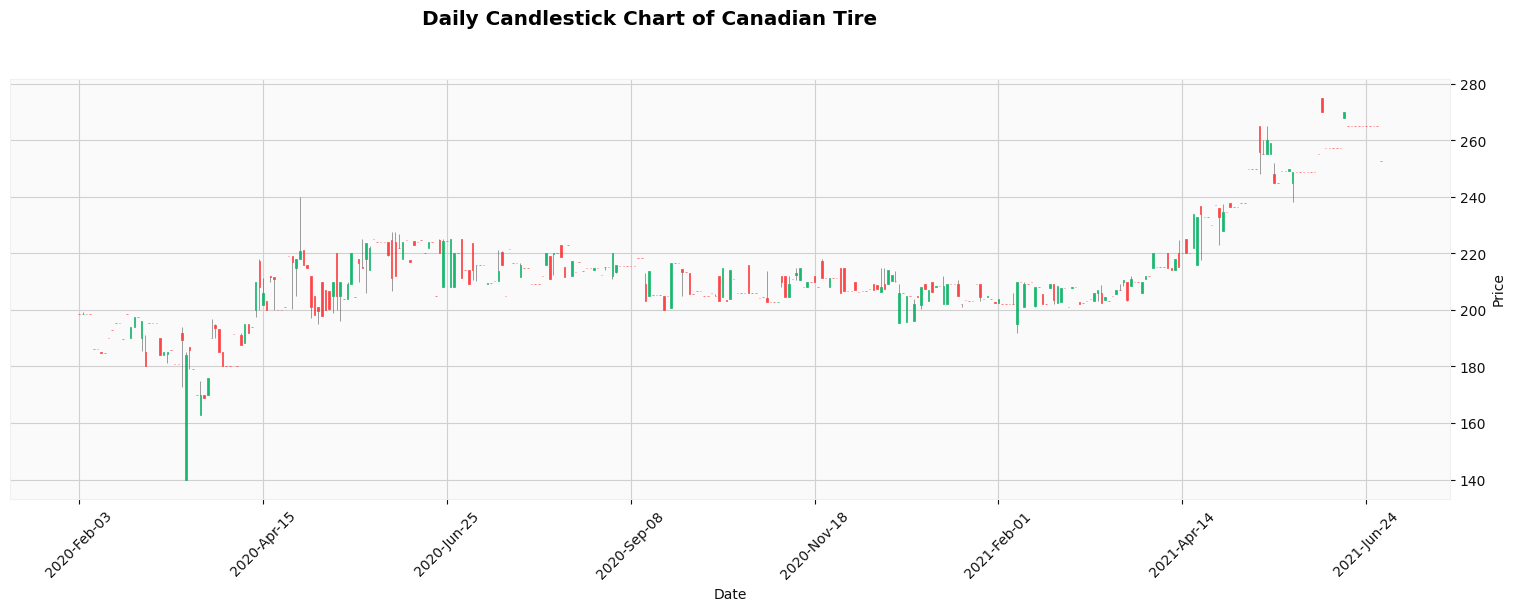

In [ ]:
# Daily Candlestick chart of Canadian Tire
mpf.plot(Canadian_Tire[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of Canadian Tire', xlabel='Date',ylabel='Price',figsize=(20, 6))


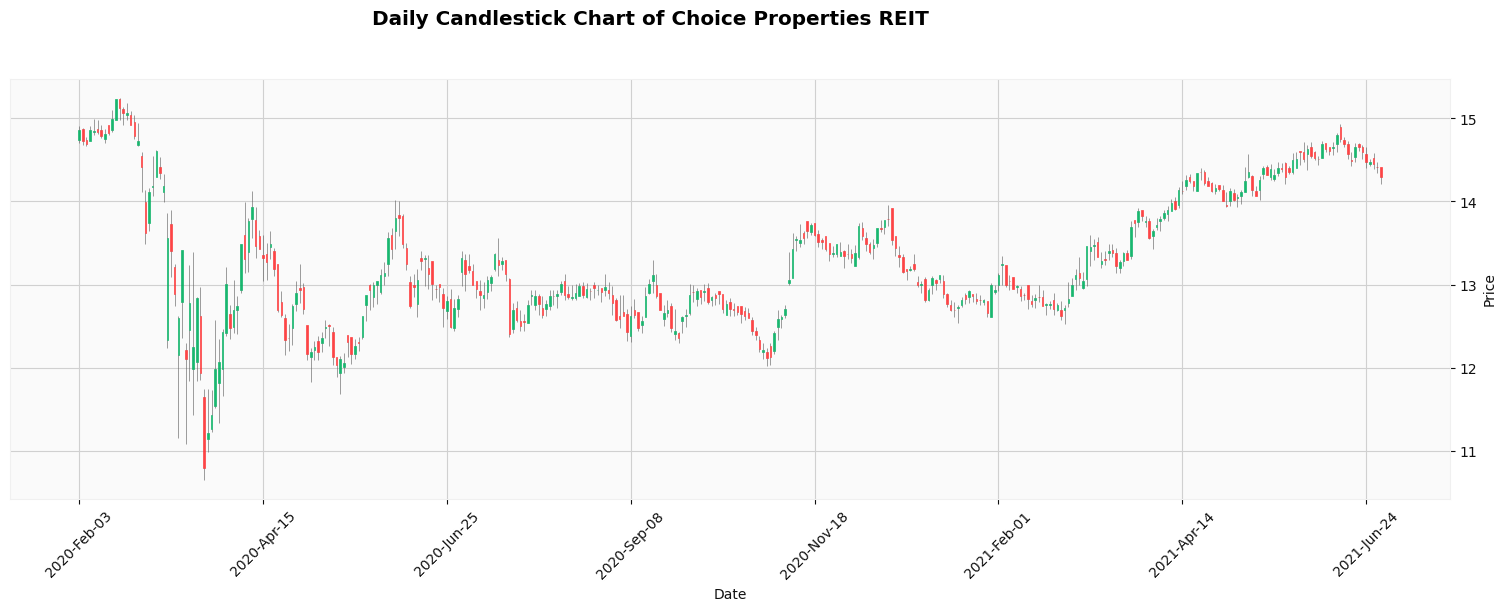

In [ ]:
# Daily Candlestick chart of Choice Properties REIT
mpf.plot(Choice_Properties[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of Choice Properties REIT', xlabel='Date',ylabel='Price',figsize=(20, 6))

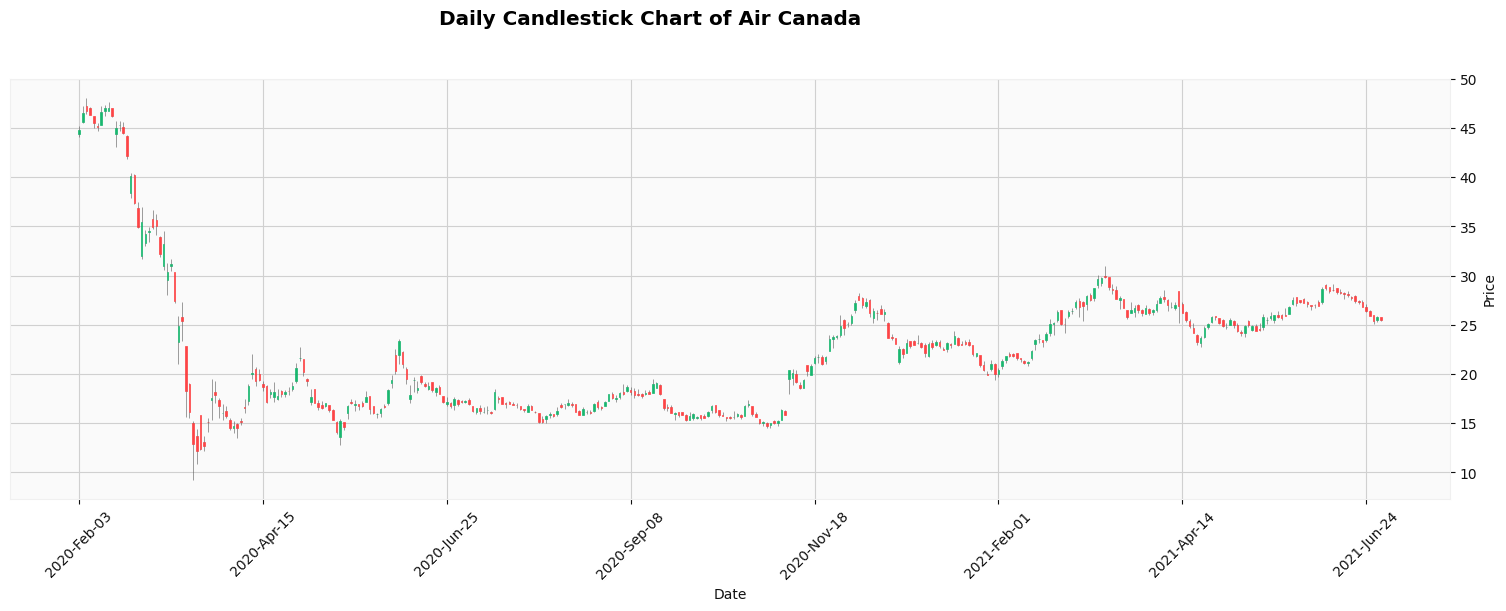

In [ ]:
# Daily Candlestick Chart of Air Canada
mpf.plot(Air_Canada[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of Air Canada', xlabel='Date',ylabel='Price',figsize=(20, 6))

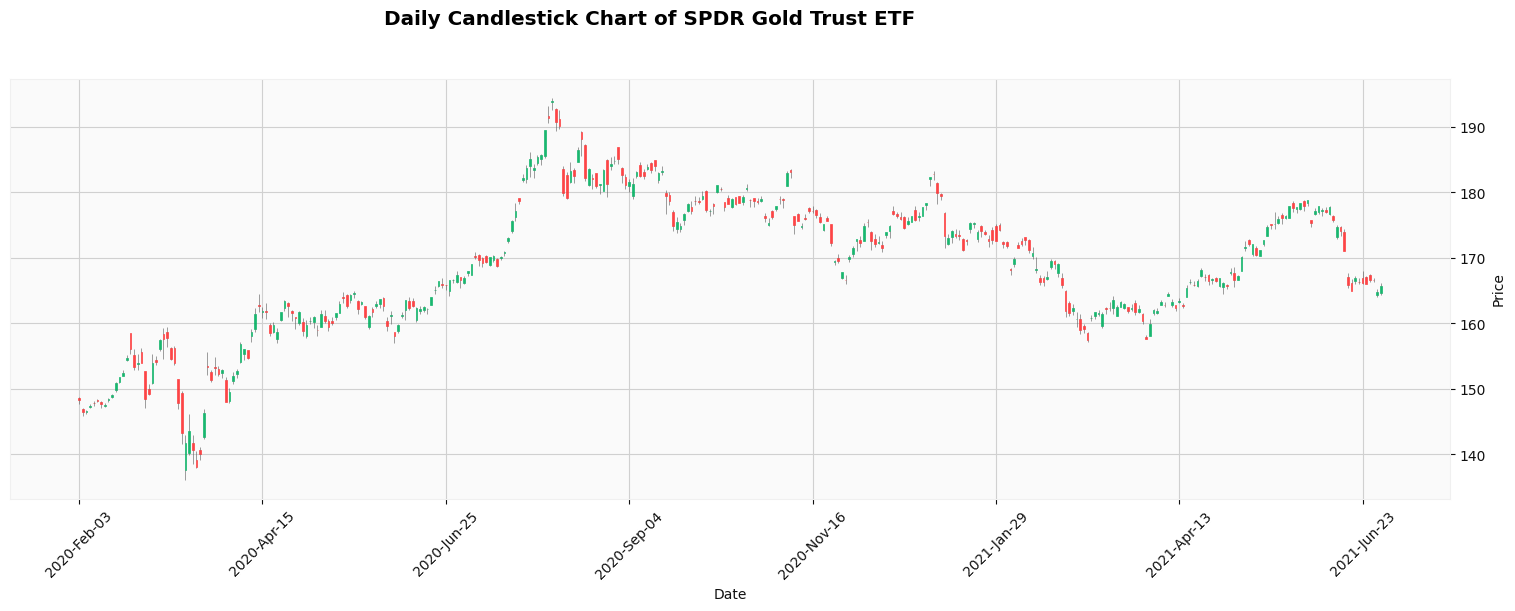

In [ ]:
# Daily Candlestick Chart of SPDR Gold Trust ETF
mpf.plot(Gold[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of SPDR Gold Trust ETF', xlabel='Date',ylabel='Price',figsize=(20, 6))